# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:

    //Does the Smartcab move at all during the simulation?
    - Smartcab is not moving at all in the simulation.
    
    //What kind of rewards is the driving agent receiving?
    - Reward is received either positive or negative based on the traffic light, oncoming traffic and Smartcab state-
        --
        1. 
        Traffic Light - Red
        Oncoming Traffic - NA
        Smart cab status - Idle
        Reward - Positive reward.
        
        2.
        Traffic Light - Green
        Oncoming Traffic - Yes
        Smart cab status - Idle
        Reward - Positive reward.
        
        3. 
        Traffic Light - Green
        Oncoming Traffic - NO
        Smart cab status - Idle
        Reward - Negative reward.
        
            
        
    How does the light changing color affect the rewards?
    
      1. 
        Traffic Light - Red
        Oncoming Traffic - NA
        Smart cab status - Idle
        Reward - Positive reward. (1.8 to 2.5 Positive rewards received).
        
        2.
        Traffic Light - Green
        Oncoming Traffic - Yes
        Smart cab status - Idle (0.62 Positive rewards received).
        Reward - Positive reward.
        
        3. 
        Traffic Light - Green
        Oncoming Traffic - NO
        Smart cab status - Idle
        Reward - Negative reward. ('-4.3 to '-5.7 negative points received.
        
   High negative points awarded while Smartcab is sitting idle in Green light with no oncoming traffic and positive points awarded for sitting idle in Red light and sitting idle in green light with oncoming traffic.


--Update-


   "
   Traffic light Green, with oncoming traffic, Smar cab idle - Smart cab is receiving negative reward for not moving.
    Traffic light Green, with oncoming traffic, Smar cab idle - 0.62 positive reward point received.

The above two sentences are not consistent with each other.
Which one is correct? Does the agent get positive or negative rewards for idling at a green light with oncoming traffic?
"

-- Correction made in the previous reply.

Driving Agent gets positive rewards for idling at a green light with oncoming traffic (if oncoming traffic = forward or right). if oncoming traffic = left, traffic light = green and agent is idling, then negative reward points awarded.

'elif action == None:
            if light == 'green' and inputs['oncoming'] != 'left': # No oncoming traffic
                violation = 1 # Minor violation
                
 '               
**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:

-In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.

-- update--

Flags:
    
    - learning   - set to True to force the driving agent to use Q-learning to learn new behaviours. This is applicable for driving agent. Set it to False will force the driving agent to take action randomly.Thus no new learning. Example- Driving agent will learn how to take left turn.
    
    - epsilon - continuous value for the exploration factor, default is 1. This is applicable for driving agent. If the value is too low, driving agent will not explore and learn new behaviour, rather it will exploite the existing learning to take decision too quickly. If the value is too high, agent will take random actions with high probability, regardless of how many of the(state,action) pairs have been explored so far.
    

    - enforce_deadline - set to True to enforce a deadline metric. This is the set timeline for the driving agent to reach a target. Example - Driving agent must reach a destination within a set dead line.
    
-In the environment.py Python file, what Environment class function is called when an agent performs an action?

-- act function is called when an agent performs an action. This act function is for the reward for the action taken by the driving agent.

-In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?

render_text(self, trial, testing=False):
        """ This is the non-GUI render display of the simulation. 
            Simulated trial data will be rendered in the terminal/command prompt. """

render(self, trial, testing=False):
        """ This is the GUI render display of the simulation. 
            Supplementary trial data can be found from render_text. """
            
render_text () is a non GUI or command prompt interface for Application output. render() is GUI rendered output to pygame.


In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?

-- next_waypoint() function considers East-West direction first. 

**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


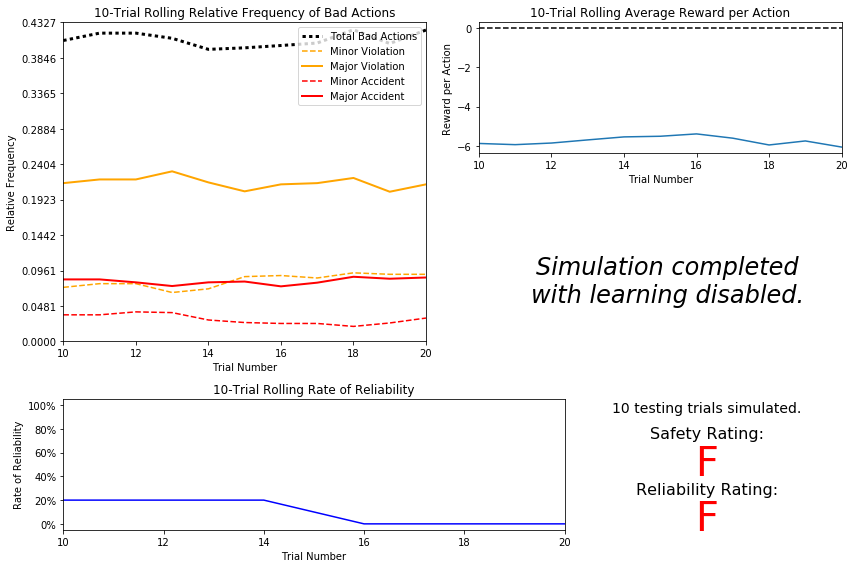

In [11]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:

-How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?

-- At the begining, driving agent was making 40% (increased to 43% eventually) bad decision which led to 9.6% Major accidents and 4.8% Minor accidents. Eventually, driving agent was making higher bad decisions (43% bad action) which resulted 9.6% Major accidents and 4.8% minor accidents.

-Given that the agent is driving randomly, does the rate of reliabilty make sense?

-- Given that the agent is driving randomly, probablity of taking right decision is 1/4= 25%. So, expected reliability if +/- 25%. Resultant output (20% reliability) of reliability is in line with the probability. However, eventually, reliability dropped to zero.

-What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?

-- Driving agent was taking more and more bad decisions over time. So, Driving agent was heavily penalized and Starting from -6 and ended at -7, shows that Driving agent was consistent on wrong decision taking and receiving penalty. 

-As the number of trials increases, does the outcome of results change significantly?

-- As the trials increases, there is no significant changes in the outcome.

-- As the number of trials increases, the following changes occured in the outcome-

(Approximate values)

--Upadated--


    - Bad decision decreased- from 40% to 43%
    - Major violation stable around -  22% 
    - Minor violation increased - from 8% to 9.6%
    - Major accidents were stable around - 9.6%
    - Minor accidents stable around - 4%
    - Reliability decreased - from 20% to 0%
    - Negative reward points decreased - from -6 to -7.
    
-Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?

--
Smartcab is neither safe not reliable for it's passenger. Approximate 80% to 100% percent time it failed to reach the destination. Approximate 60% cases it took bad decision. Surprisingly, compared to bad decision ratio, Smartcab is safe  (43% bad decision vs 9.6% Major accidents). However, Major accident is not acceptable for the passenger or the fellow drivers on the road.  

**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:

Following Features are important to Driving agent -

Safety Features- 
    input (Light)- Green light stands for safe to Go. Red light stands for 'Stop'. Most important environment variable.
    
    input (Left)- If Light is 'red' and input(left)= 'forward', it means Driving agent can not take right turn due to a car approaching from left to right direction.  

    input (oncoming) - If input(oncoming) = forward or input (oncoming) = right, it means cross traffic and driving can not go forward.
    
    
efficiency feature- 

    input (waypoint)- this is the right direction where the Driving agent should move towards destination.
    

Discarded features-

     input (right) - since it's a single lane driving, there is no use of input (right). Otherwise, in case of dual lane traffic, Driving agent need to consider the car (driving direction) next to him.
     
     deadline - this is not used since there is no method used to improve the routing efficiency which can reduce the travel time.

**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:

First consider the features and respective states -

input (Light) - Red, Green ----------------------2
input (Left) - Forward, left, right, None--------4
input (oncoming) - Forward, left, right, None----4
input (waypoint) - Forward, left, right, --------3

Total states - 96 states. It is possible for the Driving agent to learn individual policy for each of the state.  
**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

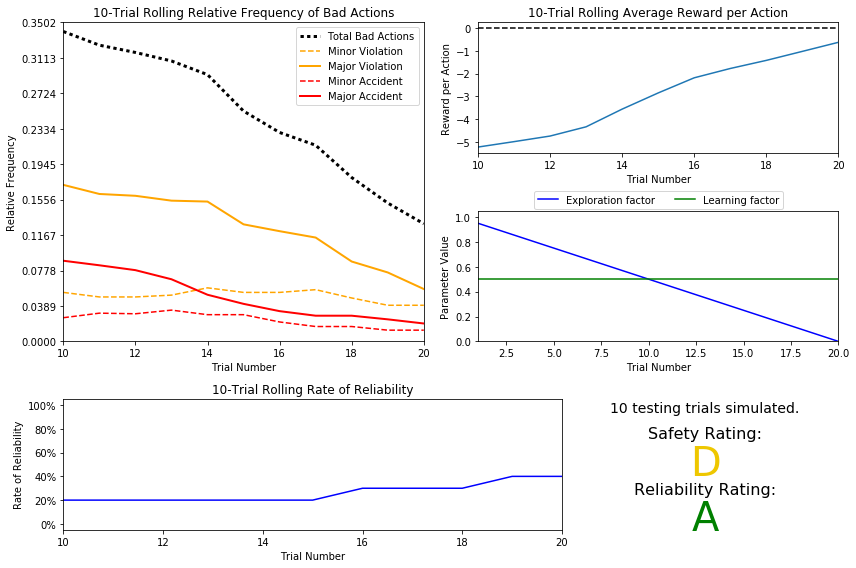

In [14]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:

                      Basic driving agent observation-        Default Q-learning agent observation  

    - Bad decision    | decreased- from 40% to 43%         |   decreased - from 35% to 14%
    - Major violation | stable around -  22%               |   decreased - from 18% to  6%
    - Minor violation | increased - from 8% to 9.6%        |   stable aroung   5%
    - Major accidents | stable around - 9.6%               |   decreased - from  9% to  2%
    - Minor accidents | decreased - from 8% to 9.6%        |   decreased - from  2% to  1%
    - Reliability     | decreased - from 20% to 0%         |   increased - from 20% to 40%
    - Safety Rating   |    F                               |    D
    - Reliability     |    F                               |    A
      Rating
  Overall observation is, after enabling Q-learning agent, Driving agent has starting started learning. As a result, Reliability improved significantly  (previous F to latest rating A) with minor improvement on Safety Rating (previous F to latest rating D). Bad decisions, Traffic rules violation and Accidents are reduced significantly. 
  
 - Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?
         -- No similarity is found between basic driving agent and Q-Learning agent since Q-learning is taking informed decision based on the highest reward giving actions. On the other hand, basic agent is taking random action.
 
 
 - Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?
 
         -- There are 20 training trials took place. Given that , epsilon value = 1 and decay value is 0.05; 1/0.05= 20 is consistant with the trial training number.
 
 - Is the decaying function you implemented for ϵϵ (the exploration factor) accurately represented in the parameters panel?
         -- Yes, decaying function accurately represented in the parameters panel.
 
 - As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
         -- As of number of trainin trials increased, no. of bad actions decreased significantly (from 35% to 14%).
            Average reward increased as the number of trials increased (from -6 to -1). 
  
 - How does the safety and reliability rating compare to the initial driving agent?
        -- Initial driving agent reliability and safety was very poor (Reliability - F, Safety - F), whereas Q-learning agent performance is improved significantly (reliability - A, Safety - D). 


**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

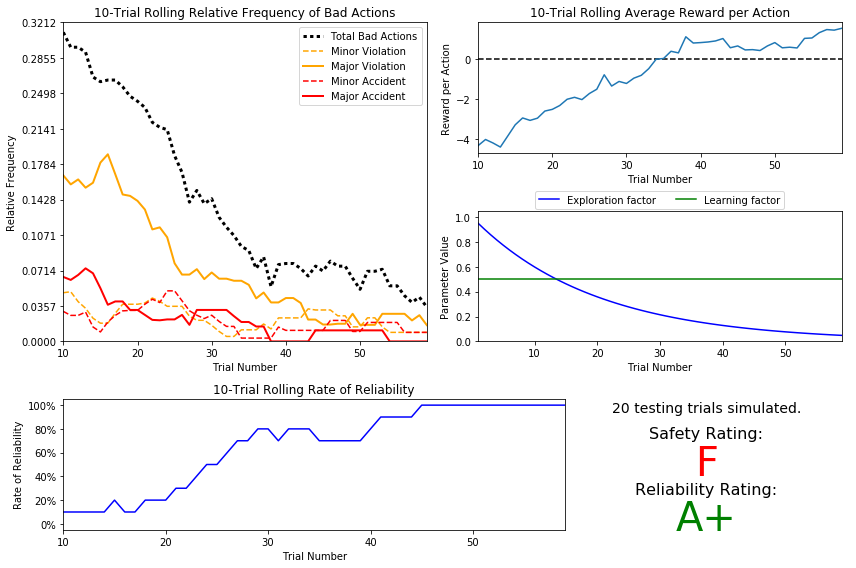

In [23]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
#Test-1
vs.plot_trials('sim_improved-learning.csv')

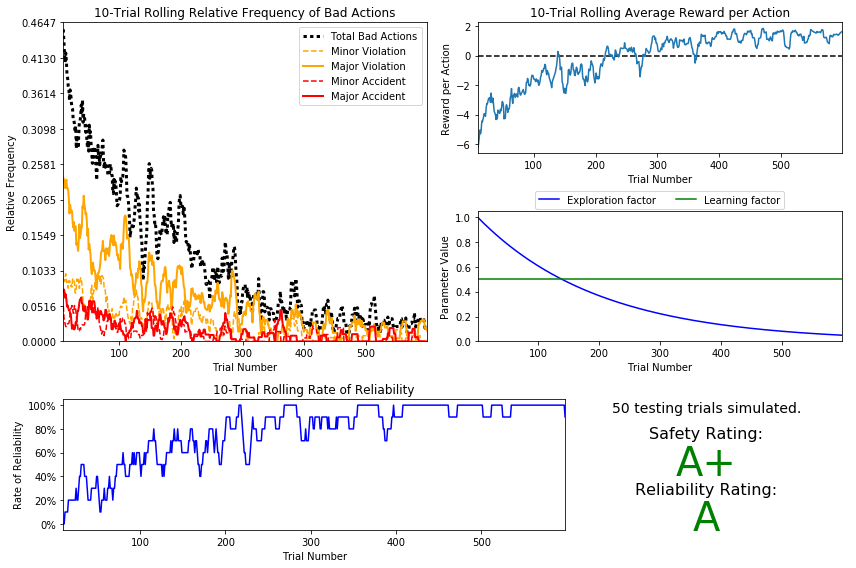

In [30]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with 600 trial and 50 test
#Test-2
vs.plot_trials('600_sim_improved-learning.csv')

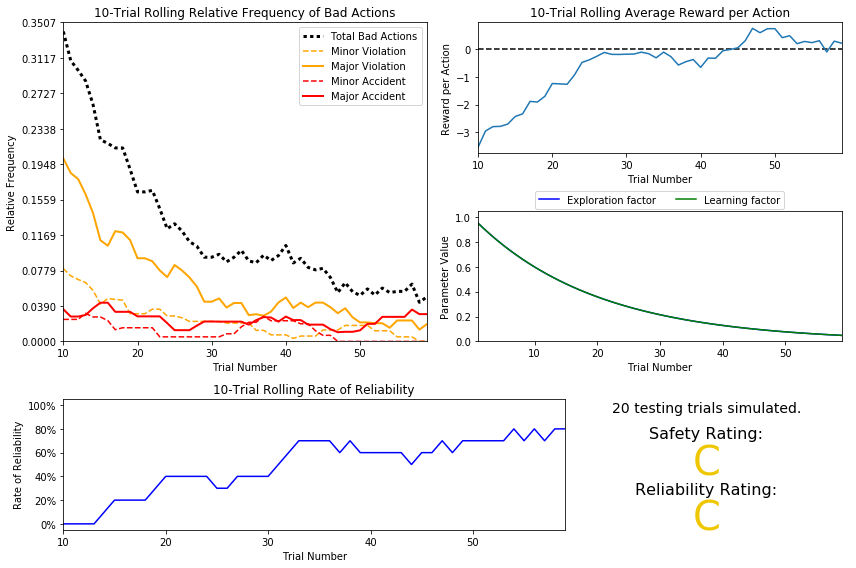

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation (with Alpha-learning rate decay function)
#Test-3
vs.plot_trials('sim_improved-learning.csv')

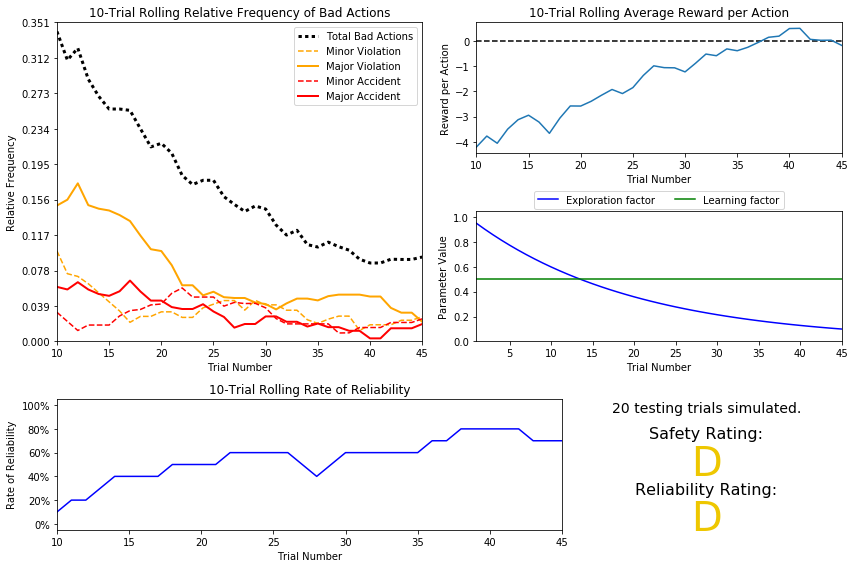

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation (with Alpha-learning rate =0.5, tolerance = 0.20)
#Test-4
vs.plot_trials('sim_improved-learning.csv')

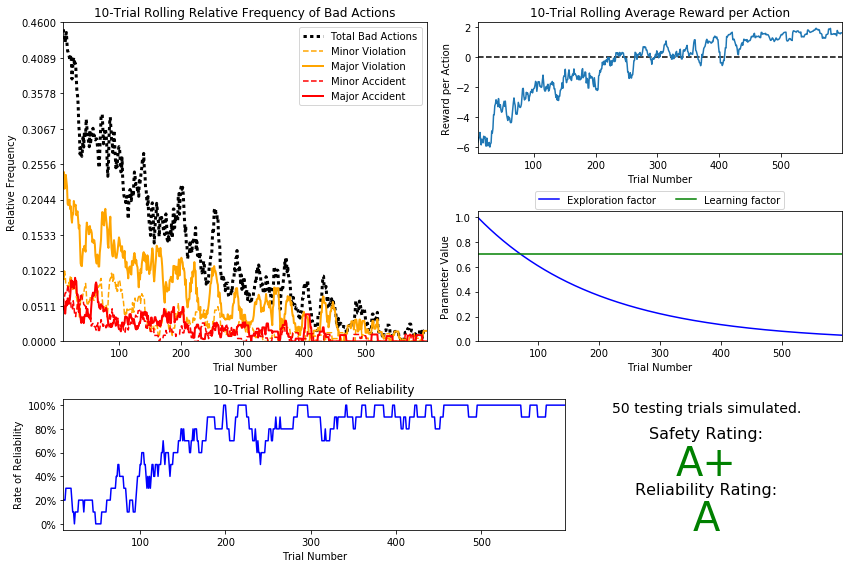

In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation (with Alpha-learning rate =0.7, 50 test)
#Test-5
vs.plot_trials('600_07_sim_improved-learning.csv')

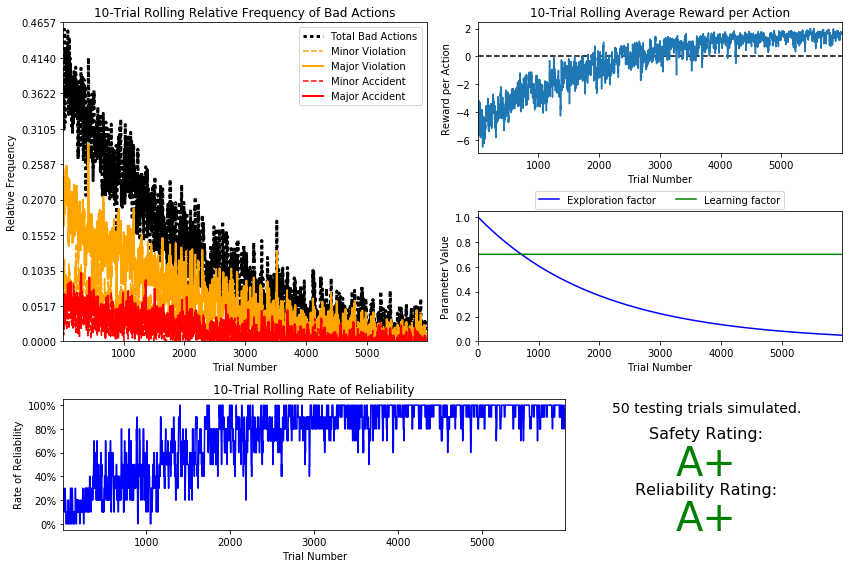

In [35]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation (with Alpha-learning rate =0.7, 50 test)
#Test-6
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:

-What decaying function was used for epsilon (the exploration factor)?

       -- The following decaying function is used - ϵ=a**t for a = 0.995 and t=incremental counter 0<t<1. 

-Approximately how many training trials were needed for your agent before begining testing?
       -- 598 training trials were needed for the driving agent before begining testing.
       
       
-What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?
        -- epsilon-tolerance - 0.05 and alpha = 0.5.
        
                    Test 1  | Test 2   | Test 3  | Test 4  |Test 5   | 
 epsilon function - 0.95-0  |  0.995-0 | 0.95-0  |  0.95-0 |0.995-0  | 
 Alpha value   -    0.5     |  0.5     | 0.95-0  |  0.5    |0.70     | 
 Tolerance     -    NA      |  0.05    | NA      |  0.20   |0.05     | 
 No. of trials -    60      |   598    |   60    |   45    | 598     | 
 Reliability   -    A+      |   A+     |   C     |   D     | A+      | 
 Safety        -    F       |   A      |   C     |   D     | A      | 
 
 
        i've tested different epsilon-tolerance value to change the no. of trials with decaying epsilon value. Also, i've tested different Alpha values.
        
        To improve the Safety rating, epsilon-tolerance - 0.05 and alpha = 0.5. is the best combination found.
        
 Test -2 is the first test were A+ reliability and Safety are achieved. Approx. 600 trials required before starting testing (epsilon-tolerance - 0.05 and alpha = 0.5). However, Test-6 shows similar result where alpha decay function is used. One difference, between test-2 and test-6 is when alpha decay function is used, bad action reduction is reduced drastically (dropped from 40% to 20% within first 100 trials).  
        
-How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?

--
                      Basic driving agent         Default Q-learning agent         Optimized Q-learning agent 
                                                              

  Bad decision    | decreased- from 40% to 43%  |   decreased - from 35% to 14%  | dropped to less than .05% 
  Major violation | stable around -  22%        |   decreased - from 18% to  6%  | dropped to less than .05% 
  Minor violation | increased - from 8% to 9.6% |   stable aroung   5%           | dropped to less than .05%
  Major accidents | stable around - 9.6%        |   decreased - from  9% to  2%  | dropped to less than .05%
  Minor accidents | stable around - 4%          |   decreased - from  2% to  1%  | dropped to less than .05%
  Reliability     | decreased - from 20% to 0%  |   increased - from 20% to 40%  | increased-from 40% to 95% 
  Safety Rating   |    F                        |    D                           | A+
  Reliability     |    F                        |    A                           | A
      Rating



                    Optimized Q-learning agent
                    (5990 trial, 50 test, Alpha = 0.7)
                                                              

  Bad decision    | dropped to less than 0.025 |   
  Major violation | dropped to less than 0.025 |   
  Minor violation | dropped to less than 0.025 |   
  Major accidents | dropped to less than 0.025 |   
  Minor accidents | dropped to less than 0.025 |   
  Reliability     | close to 100% |   
  Safety Rating   |    A+                      |   
  Reliability     |    A+                      |   
      Rating



Default Q-learning agent vs optimized Q-learning agent with epsilon decay function has a significant difference (positive improvement for optimized Q-learning agent).  Seems like after 300 trials it is much more beneficial to exploite learning rathar than explore new actions.

-Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?

        -- A+ rating for safety and A rating for reliability along with 98% success in test results show that driving agent successfully learned an appropriate policy.
        
        --A+ rating for safety and reliability for test 6 (Alpha = 0.7, 6000 trials.
        
-Are you satisfied with the safety and reliability ratings of the Smartcab?
        -- A+ rating for safety and  A rating reliability is acceptable performance. (test-2)
        -- A+ rating for safety and reliability for test 6 (Alpha = 0.7, 6000 trials.
**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:


Expected optimal policy should be as follow considering US traffic regulations. Here, right turn is allowed even when light is 'red'. 

- On a green light, a left turn is permitted if there is no oncoming traffic making a right turn or coming straight through the intersection.
- On a red light, a right turn is permitted if no oncoming traffic is approaching from your left through the intersection. To understand how to correctly yield to oncoming traffic when turning left


syntax- (waypoint, inputs['light'],inputs['oncoming'], inputs['left'])


            Policy                      Action
('forward', 'red', 'right', 'left')     |  None 
('right', 'red', None, 'left')          |  right
('right', 'red', 'right', 'forward')    |  None
('left', 'red', 'right', 'right')       |  None
('left', 'green', 'left', 'forward')    |  left
('left', 'green', 'forward', 'forward') |  None
('left', 'green', 'right', None)        |  None
('forward', 'green', 'forward', 'right')|  forward

Example from sim_improved-learning.txt.

 Example -1

('right', 'red', 'right', 'forward')
 -- forward : -30.13
 -- None : 1.92  <-----
 -- right : 0.00
 -- left : -30.10

Action - None

Example -2

('forward', 'red', 'right', 'left')
 -- forward : -19.78
 -- None : 1.81
 -- right : 0.88
 -- left : -30.24

Action- None

Example -3

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 2.13
 -- right : 0.34
 -- left : 0.00

Action - None 


For the above cases, optimal policy is followed by the Driving agent. Optimial policy ensures that Driving agent do not break Red light or drive forward/left when cross-traffic is present.


-For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.


--  In the following cases, policy is sub-optimal. Whenever, Light = Red, Driving agent does take right, even, if it's free.

Sub-optimal policy-


Test -6 (Trial -6000, Alpha-0.7)

 ('left', 'green', 'forward', 'forward')
 -- forward : 0.18
 -- None : -4.71
 -- right : 0.50
 -- left : -19.77
 
 ('left', 'green', 'forward', 'left')
 -- forward : 0.25
 -- None : -4.25
 -- right : 0.59
 -- left : -19.59
 
 - Collission detected on left turn. Optimal policy should be, action - None. However, agent took right turn.
 
 
 
 Test -2 (Trial -600, Alpha-0.7)
 
 ('left', 'green', 'forward', 'forward')
 -- forward : 0.71
 -- None : -4.81
 -- right : 1.81
 -- left : -20.41
 
 ('left', 'green', 'forward', 'left')
 -- forward : -0.12
 -- None : -4.37
 -- right : 0.35
 -- left : -19.94
 
 - Collission detected on left turn. Optimal policy should be, action - None. However, agent took right turn.

The above is sub-optimal policy. However, considering the positive reward point to take right turn compared to other actions, it is the right choice.

** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:

Two charteristics are -

1. Smartcar related - Traffic on the street is changing continously. Traffic pattern or Traffic light pattern is not consistant as the real life traffic. So, it is not possible to predict the traffic condition 2 step ahead. Future rewards would be invalid since driving agent is continously dealing with current state reward without looking at future.

2. Environment related - Every trial has a different environmental setup- target destination is changing. So, long term goal is changing in every trial. Again, dealing with present state reward is much important for the driving agent than the future reward.


update -

    Here are a few questions to guide you towards the first characteristic:
    
    - Remember how the agent sees the world; what does this mean for the states? Are they linked to specific intersections (locations)?Does it make sense to talk about the distance between the destination and any specific states?Thus, can we propagate rewards towards states which are "close to the destination"?

 -- For agent, each intersection is unique. In each intersection, agent calculates the state (environmental inputs) and define the action based on the rewards calculated. This is an independent process. Reward is not associated with the distance between the destination and any specific state. Hence, agent is concern only with the present reward. Rewards are not propagated to state 'closer to destination'. 
 
     In short, Agent does not know whether he is moving closer to the destination or going far from the destination by taking an action. 

As for the second characteristic:

    -Let's assume that the states are linked to specific intersections so that the first issue is solved. Now, we can propagate reward away from the destination.But does the destination stay at the same intersection over the trials? Then, if we propagate reward away from the destination, after a while, how many of the intersections are we propagating reward away from?

-- Assuming that rewards are propagated away from the destination. In this case, destination does not have to stay at the same intersection over the trials. 
    In this case, either we have to propage reward for each of the intersection to imitate the distance from any state to destination or we have to calculate an optimum route first from the agent position and the destination. Now, we can calculate reward for following the optimum route.  
    

    
    
    
    

**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.